<a href="https://colab.research.google.com/github/rerebebeccacca/Recommend_system20210713/blob/main/Matplotlib_%26_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Parameters:	
x, y : names of variables in data

Input data variables; must be numeric.

hue : name in data, optional

Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

size : name in data, optional

Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

style : name in data, optional

Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.

data : DataFrame

Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

row, col : names of variables in data, optional

Categorical variables that will determine the faceting of the grid.

col_wrap : int, optional

“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

row_order, col_order : lists of strings, optional

Order to organize the rows and/or columns of the grid in, otherwise the orders are inferred from the data objects.

palette : palette name, list, or dict, optional

Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

hue_order : list, optional

Specified order for the appearance of the hue variable levels, otherwise they are determined from the data. Not relevant when the hue variable is numeric.

hue_norm : tuple or Normalize object, optional

Normalization in data units for colormap applied to the hue variable when it is numeric. Not relevant if it is categorical.

sizes : list, dict, or tuple, optional

An object that determines how sizes are chosen when size is used. It can always be a list of size values or a dict mapping levels of the size variable to sizes. When size is numeric, it can also be a tuple specifying the minimum and maximum size to use such that other values are normalized within this range.

size_order : list, optional

Specified order for appearance of the size variable levels, otherwise they are determined from the data. Not relevant when the size variable is numeric.

size_norm : tuple or Normalize object, optional

Normalization in data units for scaling plot objects when the size variable is numeric.

legend : “brief”, “full”, or False, optional

How to draw the legend. If “brief”, numeric hue and size variables will be represented with a sample of evenly spaced values. If “full”, every group will get an entry in the legend. If False, no legend data is added and no legend is drawn.

kind : string, optional

Kind of plot to draw, corresponding to a seaborn relational plot. Options are {scatter and line}.

height : scalar, optional

Height (in inches) of each facet. See also: aspect.

aspect : scalar, optional

Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

facet_kws : dict, optional

Dictionary of other keyword arguments to pass to FacetGrid.

kwargs : key, value pairings

Other keyword arguments are passed through to the underlying plotting function.

Returns:	
g : FacetGrid

Returns the FacetGrid object with the plot on it for further tweaking.

# Seaborn圖樣式
有五種預設seaborn主題：darkgrid，whitegrid，dark，white，和ticks。它們各自適合不同的應用和個人喜好。默認主題是darkgrid

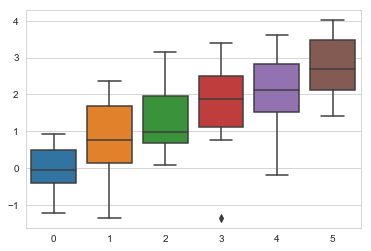

In [ ]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

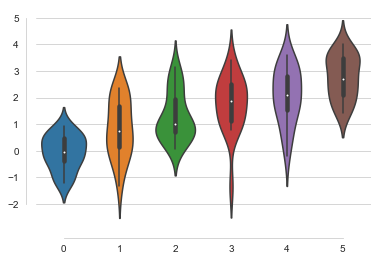

In [ ]:
# 一些情節受益於將尖刺偏離數據，這也可以在呼叫時完成despine()。
# 當刻度不覆蓋整個軸範圍時，該trim參數將限制倖存脊柱的範圍。

f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

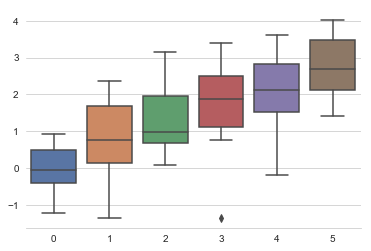

In [ ]:
# 使用其他參數控制刪除哪些刺despine()

sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

# 暫時設定圖形樣式
雖然來回切換很容易，但您也可以axes_style()在with語句中使用該功能來臨時設置繪圖參數。
這也允許您使用不同風格的軸製作圖形

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

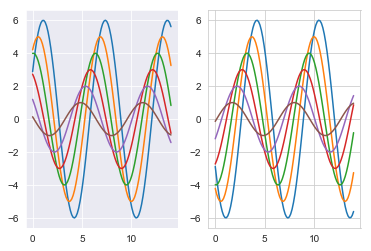

In [ ]:
f = plt.figure()
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

In [ ]:
sns.set(style="ticks")
tips = sns.load_dataset("tips")


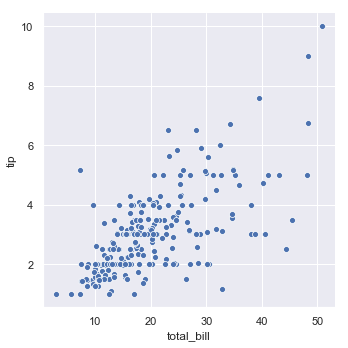

In [ ]:
# 散點圖關聯變量
sns.set(style="darkgrid")
sns.relplot(x="total_bill", y="tip", data=tips);

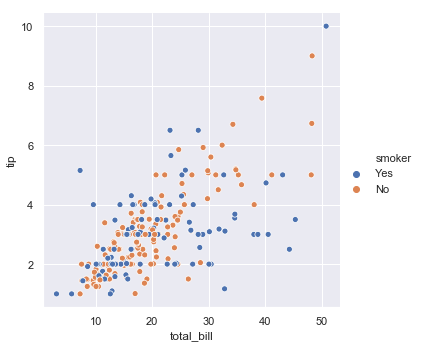

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

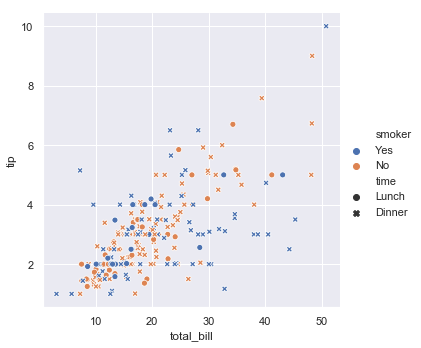

In [ ]:
# 通過獨立地改變每個點的色調和样式，也可以表示四個變量
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

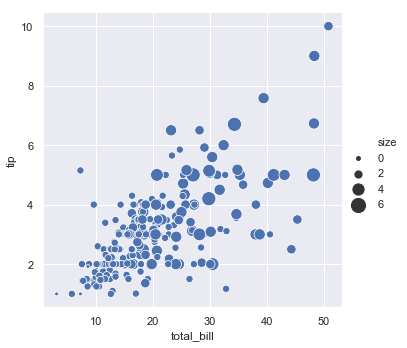

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

# Emphasizing continuity with line plots

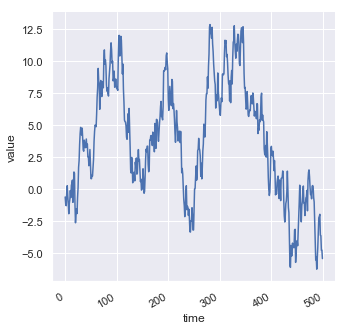

In [ ]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

C:\Users\Jeffrey.yc Chen\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


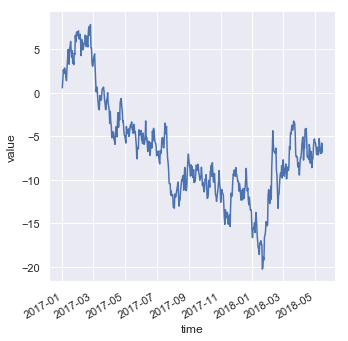

In [ ]:
# Ploting with date data
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

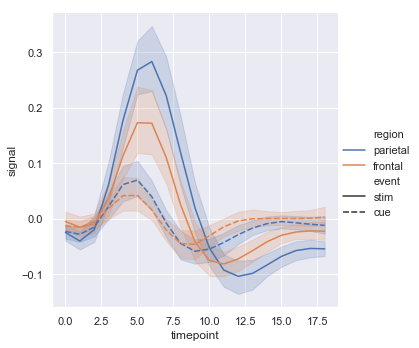

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

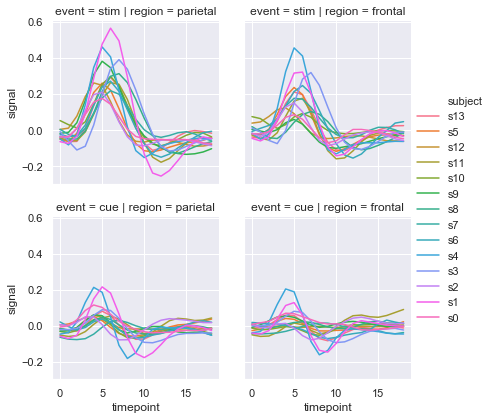

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

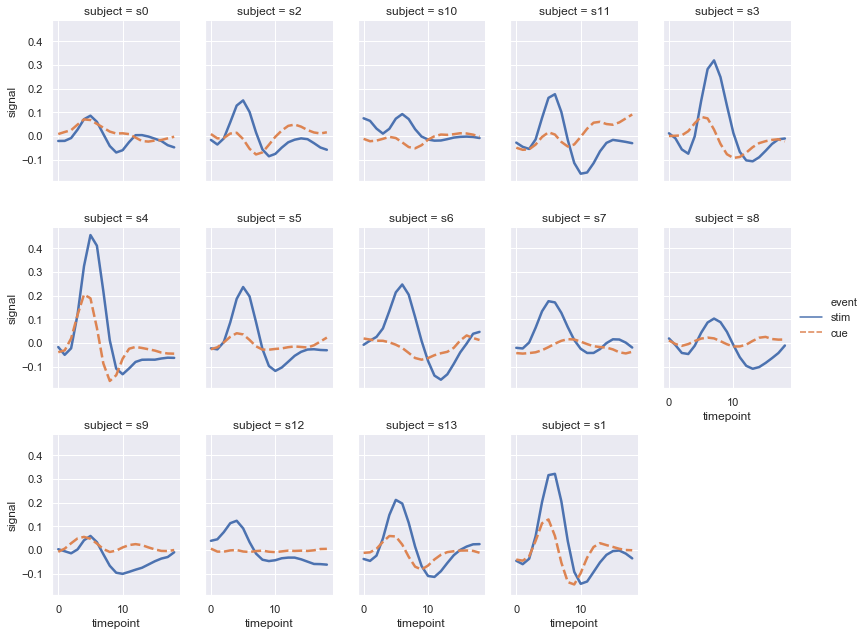

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

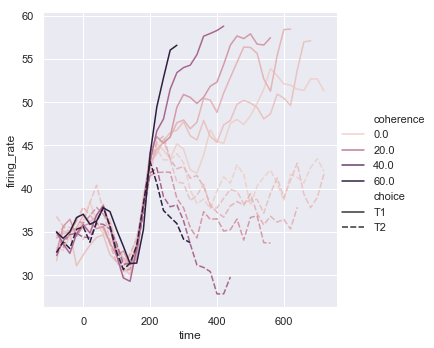

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

# 繪製成對數據關係
PairGrid還允許您使用相同的繪圖類型快速繪製小子圖的網格，以可視化每個子圖中的數據。在a中PairGrid，每個行和列都分配給不同的變量，因此結果圖顯示數據集中的每個成對關係。這種情節有時被稱為“散點圖矩陣

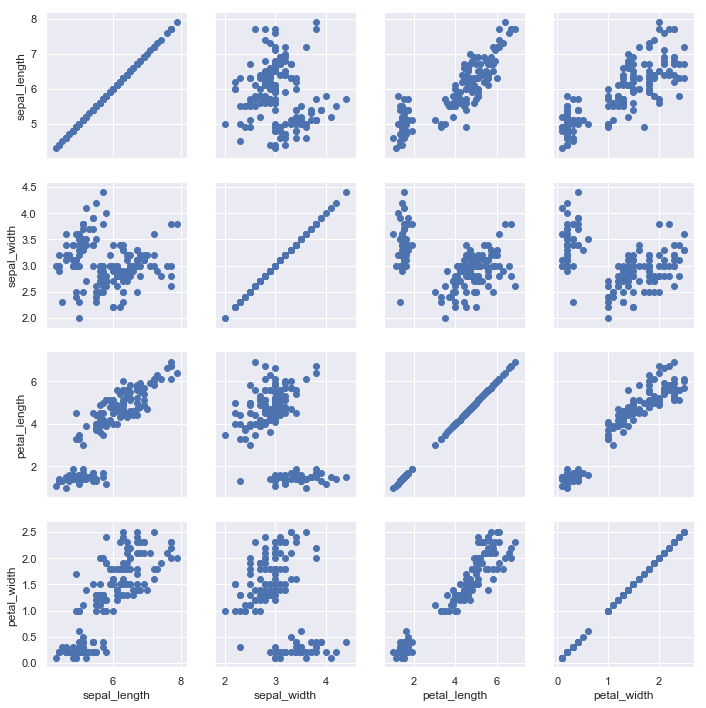

In [ ]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

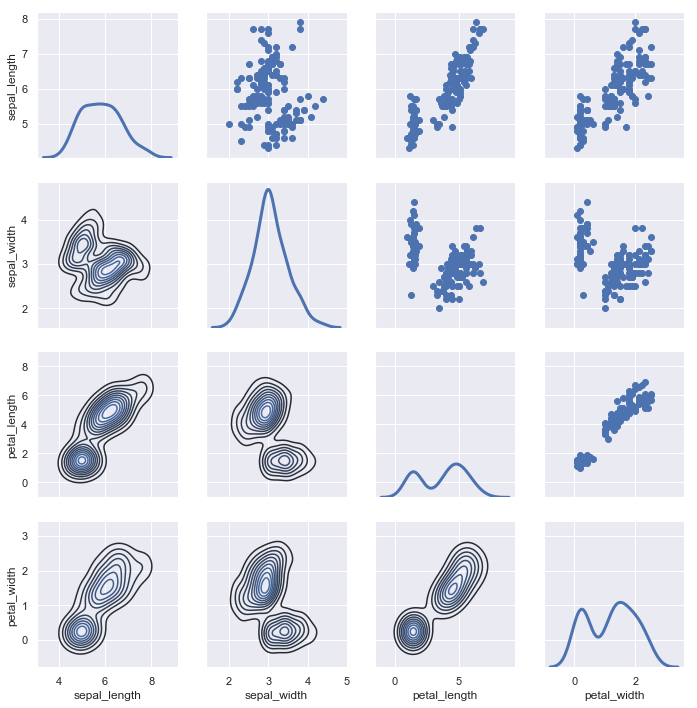

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

# Joint kernel density estimate

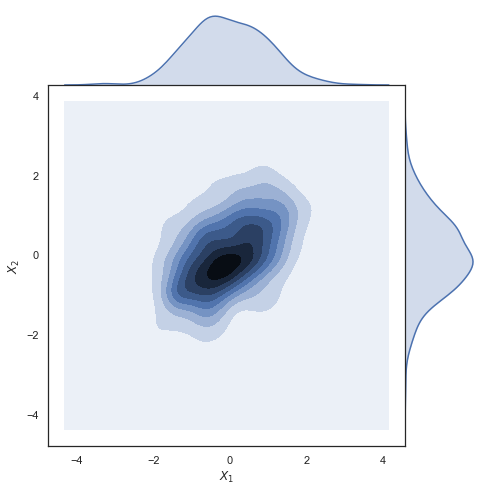

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

Text(3.8, 4.5, 'setosa')

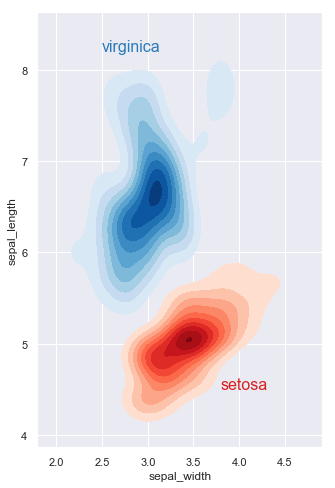

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

# Discovering structure in heatmap data

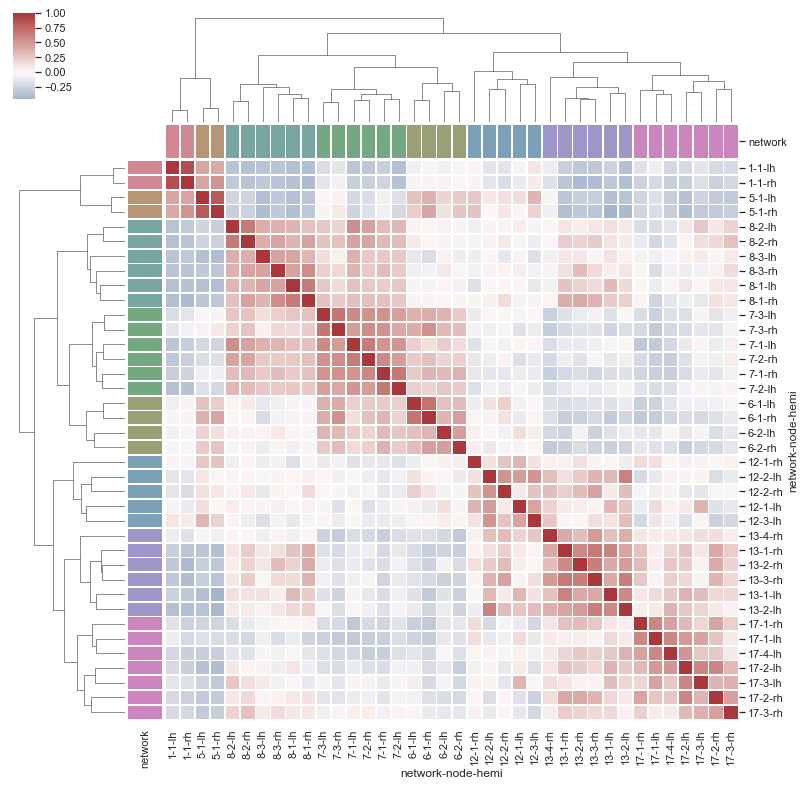

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

# 使用color和label關鍵字參數映射一個不按預期方式工作的函數

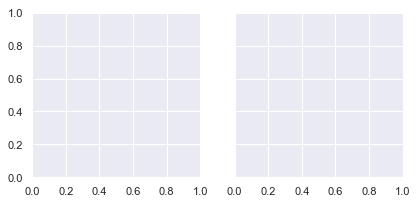

In [ ]:

# 檢查tips數據集中午餐和晚餐之間的差異
tips = sns.load_dataset("tips")

# 初始化網格會設置matplotlib圖形和軸，但不會在它們上繪製任何內容
g = sns.FacetGrid(tips, col="time") 

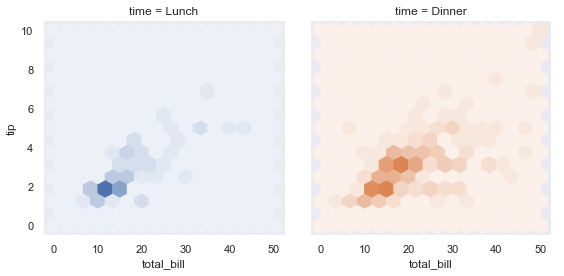

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);